In [4]:
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
import numpy as np

from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cross_validation import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.base import clone
from sklearn.utils import shuffle

In [5]:
def build_model(hyper_parameters):

    net = NeuralNet(
        layers=[
            ('input', layers.InputLayer),
            ('conv1', layers.Conv2DLayer),
            ('pool1', layers.MaxPool2DLayer),
            ('conv2', layers.Conv2DLayer),
            ('pool2', layers.MaxPool2DLayer),
            ('conv3', layers.Conv2DLayer),
            ('pool3', layers.MaxPool2DLayer),
            ('hidden4', layers.DenseLayer),
            ('hidden5', layers.DenseLayer),
            ('output', layers.DenseLayer),
            ],
        input_shape=(None, 1, 64, 64),
        verbose=1,
        **hyper_parameters
        )
    return net

## Load data & pre-processing

In [7]:
# Load X
data = np.load("data_64x64.npy.npz")
X = data['X'] / 255.

# Load y
file_y = "latin_labels" # or "french_labels"
y = map(lambda l:l.decode("utf-8")[0:-1], open(file_y).readlines())
y = np.array(y, dtype='unicode')

counts = Counter(y)
classes = counts.keys()
nb = counts.values()

most_frequent_classes = map(lambda (c, n):c,
                            sorted( zip(classes, nb), key=lambda (c, n):n, reverse=True))
# take 5 most frequent classes
nb_most_freq = 5
most_frequent_classes = most_frequent_classes[0:nb_most_freq]

# construct a filter of examples according to the most frequent classes
most_freq = (y == most_frequent_classes[0])
for c in most_frequent_classes[1:]:
    most_freq |= (y == c)

## Visualizations

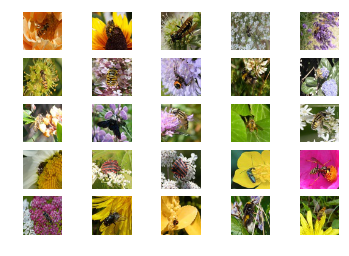

In [29]:
# Show some random insects

nb_row = 5
nb_col = 5

fig = plt.figure()
k = 0
for r in range(nb_row):
    for c in range(nb_col):
        ax = fig.add_subplot(nb_row, nb_col, k + 1)
        sample_id = np.random.randint(0, X.shape[0])
        ax.axis('off')
        #plt.title(y[sample_id])
        ax.imshow(X[sample_id])
        k += 1
plt.show()

## Define hyper-parameters & build the model

In [ ]:
hyper_parameters = dict(
    conv1_num_filters=32, conv1_filter_size=(3, 3), pool1_pool_size=(2, 2),
    conv2_num_filters=64, conv2_filter_size=(2, 2), pool2_pool_size=(2, 2),
    conv3_num_filters=128, conv3_filter_size=(2, 2), pool3_pool_size=(2, 2),
    hidden4_num_units=500, hidden5_num_units=500,
    output_num_units=30, output_nonlinearity=None,

    update_learning_rate=0.01,
    update_momentum=0.9,
    max_epochs=1000,
)

net = build_model(hyper_parameters)

## Split the data

In [10]:
X_, y_ = X[most_freq], y[most_freq]
X_, y_ = shuffle(X_, y_)
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.25)

MemoryError: 

## Training

In [ ]:
net.fit(X_train, y_train)

y_pred = net.predict(X_test)
score = accuracy_score(y_pred, y_test)
print(score)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))